In [1]:
import os
import sys
import numpy as np
import pandas as pd
!pip install -U asteroid

     |████████████████████████████████| 241 kB 33.8 MB/s eta 0:00:01
     |████████████████████████████████| 39.3 MB 31.1 MB/s eta 0:00:01
  Using cached julius-0.2.6-py3-none-any.whl
     |████████████████████████████████| 61 kB 94 kB/s s eta 0:00:01
  Using cached SoundFile-0.10.3.post1-py2.py3-none-any.whl (21 kB)
  Using cached torch_stoi-0.1.2-py3-none-any.whl
     |████████████████████████████████| 59 kB 1.5 MB/s  eta 0:00:01
     |████████████████████████████████| 1.0 MB 56.7 MB/s eta 0:00:01
  Using cached torchaudio-0.10.0-cp38-cp38-manylinux1_x86_64.whl (2.9 MB)
  Using cached torch-1.10.0-cp38-cp38-manylinux1_x86_64.whl (881.9 MB)
  Using cached asteroid_filterbanks-0.4.0-py3-none-any.whl (29 kB)
  Using cached pb_bss_eval-0.0.2-py3-none-any.whl (14 kB)
  Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
  Using cached pystoi-0.3.3-py2.py3-none-any.whl
  Using cached cached_property-1.5.2-py2.py3-none-any

In [4]:
!wget https://www.merl.com/demos/deep-clustering/media/female-female-mixture.wav


--2021-11-12 16:52:36--  https://www.merl.com/demos/deep-clustering/media/female-female-mixture.wav
Resolving www.merl.com (www.merl.com)... 137.203.190.5
Connecting to www.merl.com (www.merl.com)|137.203.190.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168680 (165K) [audio/x-wav]
Saving to: ‘female-female-mixture.wav’

female-female-mixtu 100%[===================>] 164.73K  --.-KB/s    in 0.1s    

2021-11-12 16:52:37 (1.68 MB/s) - ‘female-female-mixture.wav’ saved [168680/168680]



In [1]:
from IPython.display import display, Audio

display(Audio("female-female-mixture.wav"))

In [2]:
!asteroid-infer "mpariente/DPRNNTasNet-ks2_WHAM_sepclean" --files female-female-mixture.wav
!echo "-----"
!ls

/home/leonfang/sep/venv/lib/python3.8/site-packages/asteroid/separate.py:148: UserWarning: File female-female-mixture_est1.wav already exists, pass `force_overwrite=True` to overwrite it
  warnings.warn(
-----
female-female-mixture_est1.wav	female-female-mixture.wav  sep.ipynb
female-female-mixture_est2.wav	main.py			   venv


In [3]:
display(Audio("female-female-mixture_est1.wav"))
display(Audio("female-female-mixture_est2.wav"))

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf

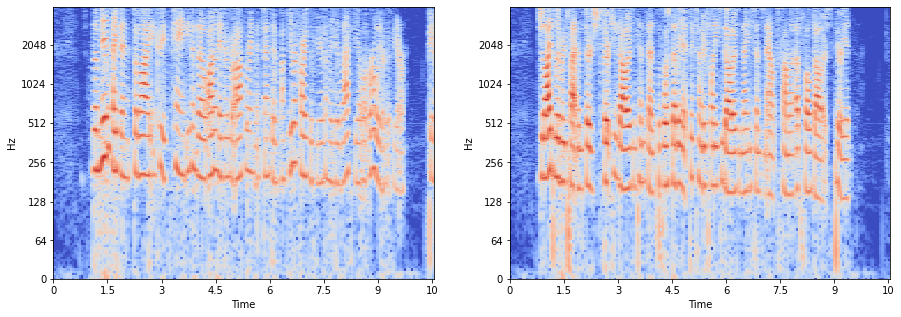

In [9]:
def show_magspec(waveform, **kw):
    return librosa.display.specshow(
        librosa.amplitude_to_db(np.abs(librosa.stft(waveform))),
        y_axis="log", x_axis="time",
        **kw
    )


est1 = sf.read("female-female-mixture_est1.wav")[0]
est2 = sf.read("female-female-mixture_est2.wav")[0]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
show_magspec(est1, sr=8000, ax=ax[0])
show_magspec(est2, sr=8000, ax=ax[1])